In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline

In [45]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
X = data.data
y = data.target

In [46]:
# Applying Linear Regression
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("R2_Score : ",r2_score(y_test,y_pred))
print("MSE : ",mean_squared_error(y_test,y_pred))

R2_Score :  0.4526027629719195
MSE :  2900.193628493482


In [47]:
#Applying Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
y_pred1 = ridge.predict(X_test)
print("R2_Score : ",r2_score(y_test,y_pred1))
print("MSE : ",mean_squared_error(y_test,y_pred1))

R2_Score :  0.46085219464119265
MSE :  2856.4868876706537


## There is not much difference in the performance of Linear Regression and Ridge here, as the LR model is already simple.

## Let's try fitting Ridge to complex model, created by adding polynomial features

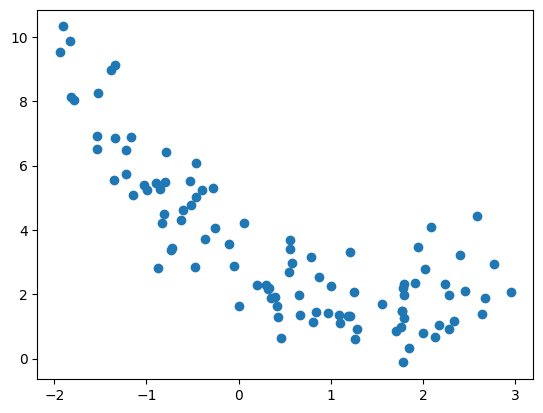

In [48]:
## Creating data

m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

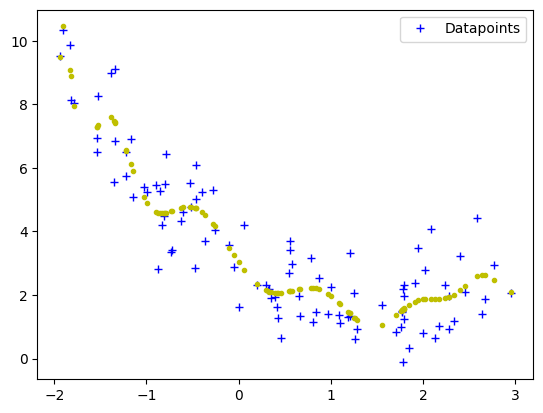

In [49]:
pf = PolynomialFeatures(degree=16, include_bias=False)
x1_poly = pf.fit_transform(x1)
lr.fit(x1_poly,x2)
pred1 = lr.predict(x1_poly)
plt.plot(x1, x2, 'b+', label='Datapoints')
plt.plot(x1, pred1, 'y.')
plt.legend()

In [50]:

def poly_ridge(x1, x2, alpha):
  pipeline = Pipeline([
      ("poly_feats : ", PolynomialFeatures(degree=25)),
      ("ridge : ", Ridge(alpha=alpha))
  ])
  pipeline.fit(x1, x2)
  return pipeline.predict(x1)

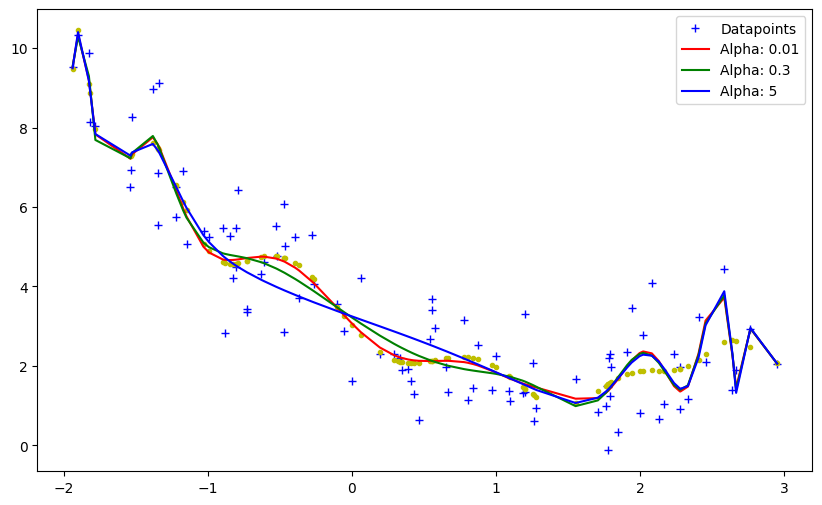

In [53]:
alphas = [0.01, 0.3, 5]
colors = ['r','g','b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')
plt.plot(x1, pred1, 'y.')

for alpha, c in zip(alphas, colors):
  prediction = poly_ridge(x1, x2, alpha)
  plt.plot(sorted(x1[:, 0]), prediction[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()